# Intro to Data Scince
## Homework 3

Due: Sunday, May 17, 2020 11:59pm.

In this homework, you will use regular expressions, and text processing. 

# 2. Regular Expressions 

Write regular expressions for the following examples that matches the data of the given format and any other reasonable variations thereof. E.g., your regex shouldn't be specific to one URL or one phone number, but should work for all examples of the same format.

**Task 2.1.** Writes a regular expression that extracts the urls out of this string, but only the URLs.

In [1]:
text = """To learn about pros/cons of data science, go to http://datascience.net.\ 
Alternatively, go to datascience.net/2020/"""
print(text)

To learn about pros/cons of data science, go to http://datascience.net.\ 
Alternatively, go to datascience.net/2020/


In [2]:
# Your code here
import re 

urls = re.findall('(?:(?:https?|ftp):\/\/)?[\w/\-?=%.]+\.[\w/\-?=%]+', text)
print(urls)

['http://datascience.net', 'datascience.net/2020/']


**Task 2.2.** Write a regular expression that extracts all phone numbers and fax numbers from this text: 

In [3]:
text = """You can reach me at 054-434-4321, or my office at (03) 502 9571 or (050) 223 957.\ 
Send me a fax at 03 502 7422. We finally made the sale for all 977 giraffes.\
They wanted 225 957 dollars for it."""

In [4]:
# Your code here
urls = re.findall('\(?\d{2,3}\)?[\s\-]\d{3}[\s\-]\d{3,4}',text)
print(urls)

['054-434-4321', '(03) 502 9571', '(050) 223 957', '03 502 7422']


**Task 2.3.** Write a regular expression that extracts all opening html tags from this, including `<br />`.

In [5]:
html = "This <b>important</b> and <u>very</u><i>timely</i><br />. Was this <span> what you meant?</span>"

In [6]:
# Your code here
# first check their is < then there must be word (+) to make sure <> not include then space is option
htmlTags = re.findall('<\w+\s?[\/]?>',html)
print(htmlTags)

['<b>', '<u>', '<i>', '<br />', '<span>']


**Task 2.4.** Write a regular expression that extracts all the names of people from the following text. 

In [7]:
text = """Arnold Schwarzenegger was born in Austria. He and Sylvester Stalone used to run a restaurant\
with J. Edgar Hoover."""

In [8]:
# Your code here
names = re.findall('((?:[A-Z]\w*\.\s)?[A-Z]\w+\s[A-Z]\w+)',text)
print(names)

['Arnold Schwarzenegger', 'Sylvester Stalone', 'J. Edgar Hoover']


**Task 2.5.** Write a regular expression that extracts the text out of all html elements of class important.

In [9]:
text = """Lorem ipsum dolor <b>sit</b> amet, <b class="important">consectetur adipiscing</b> elit,\ 
sed do eiusmod <span id="note">tempor incididunt ut</span> <div>labore <strong class="important">\
et dolore magna</strong> aliqua.</div> Ut enim ad minim veniam, quis nostrud exercitation ullamco."""

In [10]:
# Your code here
importantText = re.findall('(?:class="important">([\w\s]*))</',text)
print(importantText)

['consectetur adipiscing', 'et dolore magna']


## 3. Text processing: Comparing Netanyahu's and Gantz's Facebook Posts


Download the `election_posts.xlsx` data set from the course moodle. The file has more than 350 posts from the two main candidates in the previous elections (Gantz and Netanyahu). You are required to write an algorithm to analyze the posts and look for some insights and differences between the candidates.

The general steps we follow are:
1. Load the data set (you can use read_excel or other pandas functions)   
+ Do preprocessing: (i.e punctuation removal, removal of english phrases, tokenization)
+ Analyze word frequencies per candidate
+ Find main differences between them (try to ignore function words)
+ Try to look for other features (i.e text len, use of emoji's, etc), and look for differences
+ Print a Wordcloud for each candidate with main words
+ Evaluate the results, and write your insights



**Task 3.1.** Load the dataset.

1. Print the exact number of posts per candidate in the corpus.


In [11]:
#encoding utf-8 and read file 
import pandas as pd
df = pd.read_excel('election_posts.xlsx',encoding='utf-8')
#checking for nan values
numOfPostsBenyamin=len(df[df.PageName=='Benjamin Netanyahu'])
numOfPostsGantz=len(df[df.PageName=='Benny Gantz'])

print("Number of posts Benjamin Netanyahu:",numOfPostsBenyamin)
print("Number of posts Benny Gantz:",numOfPostsGantz)

Number of posts Benjamin Netanyahu: 186
Number of posts Benny Gantz: 168


### Task 3.2 Preprocessing

Preprocess the text data. In particular remove punctuations (be careful with "), remove english words, and tokenize the posts into token vectors (one vector for each post)



In [12]:
from nltk.tokenize import RegexpTokenizer
def onlyHebrew(s):
    tokenizer = RegexpTokenizer("[0-9א-ת]+\"?\״?[א-ת]+")
    s_tokenized = tokenizer.tokenize(s)
    return s_tokenized
df.Data = df.Data.apply(onlyHebrew)

df

,PageName,Data
0,Benjamin Netanyahu,"[חשוב, לקרוא]"
1,Benjamin Netanyahu,"[בועז, ביסמוט, עורך, ישראל, היום, היום, מחנה, ..."
2,Benjamin Netanyahu,[בושה]
3,Benjamin Netanyahu,[תודה]
4,Benjamin Netanyahu,"[התקשורת, מנסה, להרדים, את, בוחרי, הליכוד, אנח..."
...,...,...
349,Benny Gantz,"[חברים, שבוע, טוב, כולנו, אוהבים, את, מדינת, י..."
350,Benny Gantz,"[רפי, איתן, היה, מגדולי, הלוחמים, של, עם, ישרא..."
351,Benny Gantz,"[הודעת, מפלגת, כחול, לבן, בעקבות, דבריה, של, ה..."
352,Benny Gantz,"[הצטרפו, לשידור, ישיר, בשעה, בני, גנץ, המועמד,..."


In [13]:
# Your code here
import numpy as np

df[df['Data'].map(lambda d: len(d)) == 0] = np.nan
df.dropna(inplace=True)

### Task 3.3 Analyze word frequencies per candidate

Analyze the total word frequencies, and frequencies of words per candidate. Once you have the absolute frequency of each word, analyze the frequencies also from a relative perspective. I.e if one candidate A has a total of 1000 tokens, and candidate B 1200 tokens, and the word "בחירות" appears 25 times in each candidate's posts. The relative frequency of that word for candidate A is 2.5% (25 / 1000) and for candidate B 2.08% (25 / 1200). 


In [14]:
import nltk
import sys
from nltk.tokenize import sent_tokenize, word_tokenize

df.reset_index(drop=True, inplace=True)
size = len(df.Data)

tok = nltk.FreqDist(df.Data[0])
for i in range(size):
    tok += nltk.FreqDist(df.Data[i])
print(tok)


<FreqDist with 7541 samples and 20630 outcomes>


In [15]:

#functions to change take 0.000 after dot and turn it into %
format = lambda x:'%.3f' % x
precentage = lambda x:'%.0f%%' % (100 *x)

#Getting all rows of Benjamin Netanyahu and rest indexs
Netanyahu_df=df[df.PageName=='Benjamin Netanyahu']
Netanyahu_df.reset_index(drop=True, inplace=True)
#get the length
numOfPostsBenyamin = len(Netanyahu_df)


#
tok2 = nltk.FreqDist(Netanyahu_df.Data[0])
for i in range(numOfPostsBenyamin):
    tok2 += nltk.FreqDist(Netanyahu_df.Data[i])
    
df_f_netanyahu = pd.DataFrame.from_dict(tok2, orient='index')
df_f_netanyahu.columns = ['Frequency']
df_f_netanyahu.index.name = 'Benjamin Netanyahu'
df_f_netanyahu.sort_values(by='Frequency', ascending=False,inplace=True)
df_f_netanyahu['Relative'] = df_f_netanyahu['Frequency']/df_f_netanyahu.Frequency.sum()

df_f_netanyahu['Relative']=df_f_netanyahu['Relative'].map(format)
df_f_netanyahu['Relative']=df_f_netanyahu['Relative'].astype(float).apply(precentage)

df_f_netanyahu

,Frequency,Relative
Benjamin Netanyahu,,
את,210,3%
של,131,2%
על,129,2%
לא,100,1%
ישראל,62,1%
...,...,...
צודקים,1,0%
חשיפה,1,0%
המשטרה,1,0%


In [16]:
Benny_df = df[df.PageName=='Benny Gantz']
Benny_df.reset_index(drop=True, inplace=True)
numOfPostsBenny = len(Benny_df)

tok3 = nltk.FreqDist(Benny_df.Data[0])
for j in range(numOfPostsBenny):
      tok3 += nltk.FreqDist(Benny_df.Data[j])
    
df_f_benny = pd.DataFrame.from_dict(tok3, orient='index')
df_f_benny.columns = ['Frequency']
df_f_benny.index.name = 'Benny Gantz'
df_f_benny.sort_values(by='Frequency', ascending=False,inplace=True)
df_f_benny['Relative'] = df_f_benny['Frequency']/df_f_benny.Frequency.sum()

df_f_benny['Relative']=df_f_benny['Relative'].map(format)
df_f_benny['Relative']=df_f_benny['Relative'].astype(float).apply(precentage)

df_f_benny

,Frequency,Relative
Benny Gantz,,
את,355,3%
ישראל,201,2%
של,198,2%
על,195,2%
לא,161,1%
...,...,...
שמזכיר,1,0%
בודד,1,0%
לפניו,1,0%


**Interpretation:** TODO

### Task 3.4 Find the main differences

Based on previous stats, find the main differences between the language and posts that each candidate uses

In [17]:
# This function turn hebrew letters reverse for us to display it properly 

from bidi.algorithm import get_display

bit = lambda x: get_display(x) 

df_f_benny.index = df_f_benny.index.map(bit)
df_f_netanyahu.index = df_f_netanyahu.index.map(bit)


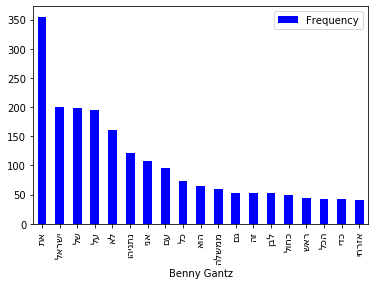

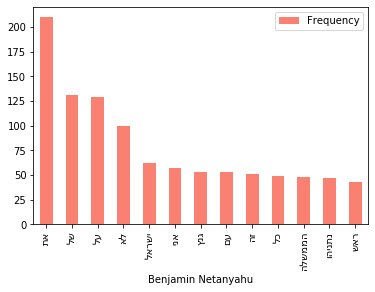

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


# we put this plot to see must ofthen words 
df_f_benny[df_f_benny.Frequency>40].plot(kind='bar',colors='blue')

df_f_netanyahu[df_f_netanyahu.Frequency>40].plot(kind='bar',colors='salmon')

**Interpretation:** TODO

### Task 3.5 Find additional interesting features

Try to look for other interesting features that can show differences between the candidates (features such as post length, emoji's, use of punctuation or any other ideas you have)

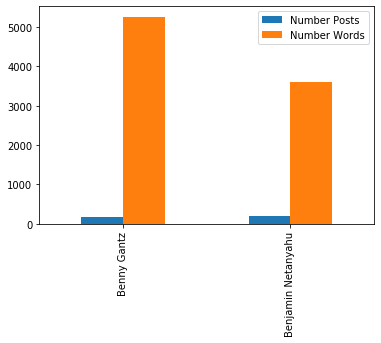

In [19]:
numOfWordsBenyamin =len(df_f_netanyahu.index) 
numOfWordsBenny = len(df_f_benny.index)

gp = pd.DataFrame(columns=['Number Posts','Number Words'],index = ["Benny Gantz",'Benjamin Netanyahu'])
gp['Number Posts'][0] = numOfPostsGantz
gp['Number Posts'][1] = numOfPostsBenyamin

gp['Number Words'][0] = numOfWordsBenny
gp['Number Words'][1] = numOfWordsBenyamin
gp.plot(kind='bar',figsize=(6, 4))

In [20]:
# ניתן לראות שלביבי יש יותר פוסטים והרבה פחות מילים מאשר לגנץ

**Interpretation:** TODO

### Task 3.6 Wordclouds

Print a wordcloud for each candidate

Print the most common words Benny Gantz:


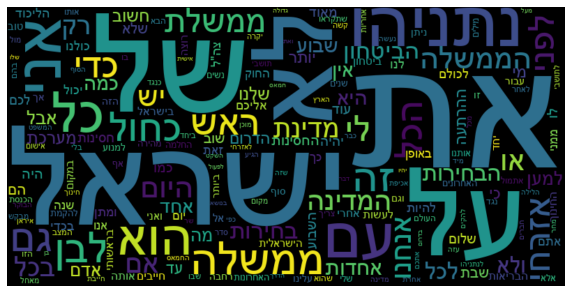

Print the most common words Benny Gantz:


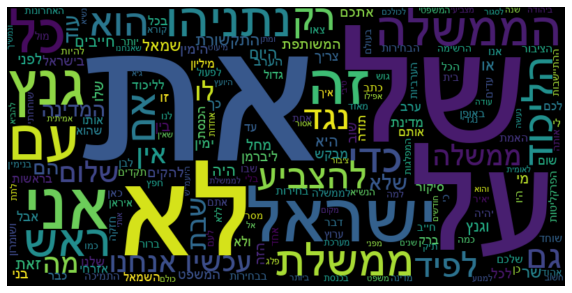

In [21]:
from wordcloud import STOPWORDS
from wordcloud import WordCloud
from PIL import Image 
import numpy as np 
import matplotlib 
import matplotlib.pyplot as plt


print("Print the most common words Benny Gantz:")
wc = WordCloud(font_path='C:\Windows\Fonts\Arial.ttf' ,width=800, height=400, max_words=200,).generate_from_frequencies(df_f_benny.Frequency)



plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

print("Print the most common words Benny Gantz:")

wc = WordCloud(font_path='C:\Windows\Fonts\Arial.ttf' ,width=800, height=400, max_words=200,).generate_from_frequencies(df_f_netanyahu.Frequency)


plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
# turn the latters back into their normal write
df_f_benny.index = df_f_benny.index.map(bit)
df_f_netanyahu.index = df_f_netanyahu.index.map(bit)

### Task 3.7 Result evaluation and insights

Look at the results and write your insights

**Interpretation:** TODO

In [23]:
# על גנץ ניתן לראות מן המילים:
# מכאן ניתן לראות שגנץ מנסה לדבר יותר על המדינה ולהדגיש את המילה אני ובכך להרים את מעמדו בציבור בנוסף 
#ניתן לראות בברירור כי גנץ מדבר הרבה על נתניהו ועל הממשלה ומעט מאוד על מפלגתו דבר זה נקרא קמפיין שלילי 
# שבו הוא מנסה להציג את המועמד השני באור שלילי וטוען כי ביכולתי לשפר את המצב 
#_____________________________________________________________________________________________________________

#על ביבי נתניהו ניתן לראות:
#בגרף של ביבי ניתן לראות באופן ברור כי ביבי התבטא בפחות מילים שחוזרות על עצמן בנוסף
#בגרף של ביבי המילה אני נאמרת יותר מאשר המילה גנץ ומכך ניתן לראות כי ביבי מקדם את דמותו 
# בנוסף ביבי השתמש מעט יותר במילה לא שזה מביא להשפעה ומחשבה של שלילה 
#בנוסף ביבי מדבר על הצבעה ומנסה למשוך את הקהל שלו לקלפי